We import libraries and data.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


We will apply some statistical tools for feature selection and thus we need to transform string values to numerical values.

In [4]:
le=LabelEncoder()

In [5]:
df["Sex"]=le.fit_transform(df["Sex"])
df["ChestPainType"]=le.fit_transform(df["ChestPainType"])
df["RestingECG"]=le.fit_transform(df["RestingECG"])
df["ExerciseAngina"]=le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]=le.fit_transform(df["ST_Slope"])

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Firstly we apply information gain method from filter methods.

In [7]:
X = df.iloc[:, :11]
y = df.iloc[:, -1]
from sklearn.feature_selection import mutual_info_classif
scores = mutual_info_classif(X, y)
print(scores)

[0.05572896 0.06618222 0.15073506 0.00551051 0.07483844 0.02178781
 0.         0.08727057 0.16444335 0.12002229 0.22830147]


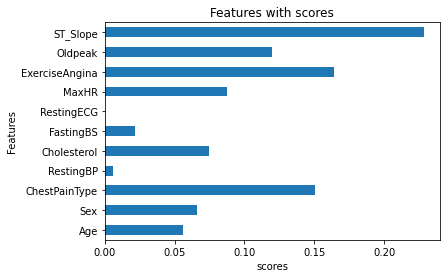

In [8]:
import matplotlib.pyplot as plt
features = df.columns[0:11]
new_df = pd.Series(scores, features)
new_df.plot(kind = 'barh')
plt.ylabel("Features")
plt.xlabel("scores")
plt.title("Features with scores")
plt.show()

Secondly we will apply chi2 method but in this function we cannot use negative value so we drop "Oldpeak" column which has negative values.

In [9]:
z=df.drop(['Oldpeak'], axis=1)

In [10]:
Z=z.iloc[:, :11]

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
feature = SelectKBest(score_func = chi2, k = 'all')
best_features = feature.fit(Z,y)
print(best_features.scores_)

[1.21285338e+02 1.80062432e+01 1.60736878e+02 2.74812269e+01
 2.98955881e+03 5.02969830e+01 1.21813572e+00 6.96650396e+02
 1.33640134e+02 7.74866801e+01 4.10000000e+02]


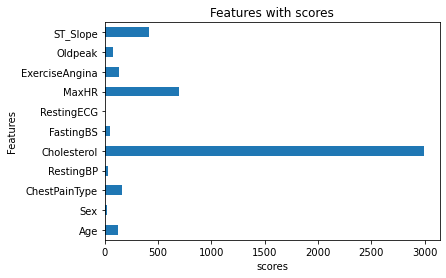

In [12]:
import matplotlib.pyplot as plt
features = df.columns[0:11]
new_df = pd.Series(best_features.scores_, features)
new_df.plot(kind = 'barh')
plt.ylabel("Features")
plt.xlabel("scores")
plt.title("Features with scores")
plt.show()

Lastly we use Correlation coefficient method from filter method.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


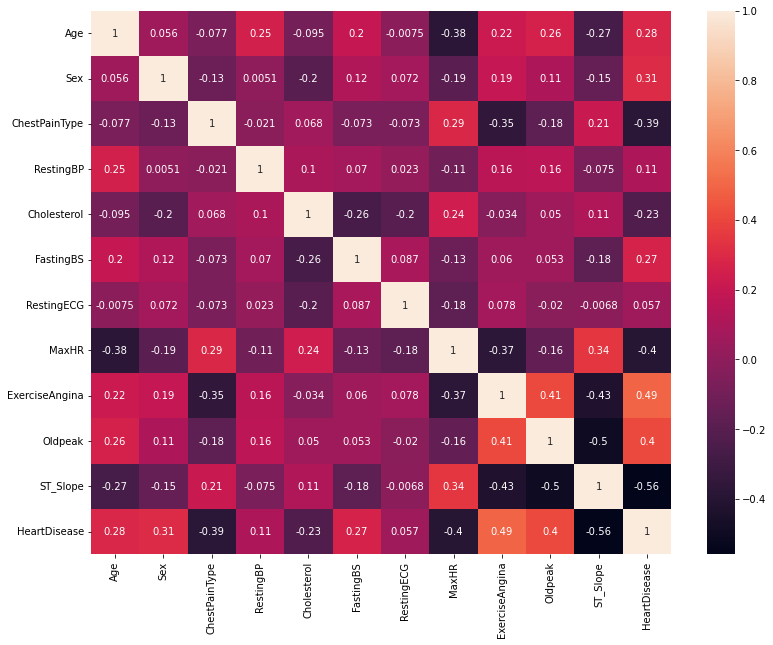

In [14]:
plt.figure(figsize = (13, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Recursive Feature Elimination(RFE) recursively removes the redundant features until the desired number of features is achieved and hence improving the performance and accuracy of the model.

In [15]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
rfe = RFE(SVC(kernel = 'linear'), n_features_to_select = 9)
rfe.fit(X_train, y_train)
pred = rfe.predict(X_test)
print("Accuracy : ", accuracy_score(pred, y_test))

Accuracy :  0.875
